<a href="https://colab.research.google.com/github/dim447/data_analyst/blob/main/FitoFarm01_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Задачи исследования**

### Загружаем данные и объединяем три датасета - ОЗОН позволяется выгружать данные за 3 месяца.



*1. Осмотр данных*
- посмотрим начало и конец датасета
- сделаем предварительные выводы
- поищем аномалии



*2. Обработка данных*
- найти и обработать пропуски
- заменить некорректные типы данных
- удалить дубликаты
- подсчитать и добавить цену квадратного метра
- добавить месяц - вместо даты название месяца
- посмотреть разную статистику, связь товара и склада отгрузки,региона доставки


*3. Ответы на вопросы*
- Какой самый популярный чай? Укажите наиболее важные характеристики
и постройте графики?
- Какую сумму приносит каждая позиция?
- Какие регионы больше всего покупают, какие склады использовать?
- Как загружены склады отгрузки?
- Проверим, куда больше отправляют товар по каждой позиции!



*4. Результаты исследования*
- Общие выводы
- Рекомендации


*Описание данных:*

*   'Дата отгрузки' - Дата отгрузки товара
*   'Месяц отгрузки' - Месяц выделяем из даты
*   'Наименование товара' - Наименование товара
*   'Итоговая стоимость товара' - Сумма продажи товара
*   'Количество' - Количество отгруженного товара
*   'Кластер отгрузки' - Логистика ОЗОН
*   'Кластер доставки' - Логистика ОЗОН
*   'Склад отгрузки' - Склад отгрузки ОЗОН
*   'Регион доставки' - Регион доставки товара
*   'Город доставки' - Город доставки товара (не всегда указан)


In [1]:
### Загружаем данные и объединяем три датасета
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df01 = pd.read_csv('/content/orders01_03.csv', sep=';')
df02 = pd.read_csv('/content/orders04_06.csv', sep=';')
df03 = pd.read_csv('/content/orders07_09.csv', sep=';')
df = pd.concat([df01, df02, df03])
df.shape


(3155, 32)

In [2]:
df.head(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
0,32901413-0114,32901413-0114-1,2023-03-31 19:48:33,2023-04-01 02:00:00,Доставлен,2023-04-05 11:24:30,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1,33790736-0039,33790736-0039-2,2023-03-31 19:10:52,2023-04-01 01:00:00,Доставлен,2023-04-01 17:18:39,318.0,RUB,"Чай липы цветки 50г/ травяной сбор ""Целебная П...",520745178,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
2,32901413-0113,32901413-0113-1,2023-03-31 11:17:55,2023-04-01 02:00:00,Отменен,NaN,157.0,RUB,Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20...,482739289,...,Юг,Вологда,АДЫГЕЙСК_РФЦ,Вологодская Область,Вологда,ПВЗ,Не премиум,нет,Ozon Карта,NaN
3,31169688-0104,31169688-0104-1,2023-03-31 10:46:57,2023-04-01 01:30:00,Доставлен,2023-04-06 11:15:52,260.0,RUB,"Чай мяты перечной листья 50г/ травяной сбор ""Ц...",520746323,...,Урал,Сургут,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Ханты-Мансийский Автономный округ - Югра,Нягань,ПВЗ,Премиум,нет,Ozon Карта,NaN
4,33007656-0150,33007656-0150-2,2023-03-31 08:43:59,2023-04-06 01:00:00,Доставлен,2023-04-07 06:31:46,157.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Санкт-Петербург и СЗО,Санкт-Петербург Север,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN


In [3]:
df.tail(5)

,Номер заказа,Номер отправления,Принят в обработку,Дата отгрузки,Статус,Дата доставки,Сумма отправления,Код валюты отправления,Наименование товара,OZON id,...,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты,Штрихкод ювелирного изделия
1232,35783531-0156,35783531-0156-5,2023-07-02 18:54:18,2023-07-03 01:00:00,Доставлен,2023-07-03 14:06:18,173.0,RUB,Чай травяной Друг Вашего иммунитета ф/п 1.5г №...,482738941,...,Санкт-Петербург и СЗО,Санкт-Петербург Юг,СПБ_БУГРЫ_РФЦ,Санкт-Петербург,Санкт-Петербург,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1233,0102531753-0026,0102531753-0026-1,2023-07-02 11:44:48,2023-07-02 15:00:00,Доставлен,2023-07-04 13:12:38,154.0,RUB,Чай травяной Друг Вашей поджелудочной железы ф...,482739358,...,Урал,Пермь,ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ,Пермский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1234,51214417-0152,51214417-0152-1,2023-07-02 03:18:25,2023-07-06 13:30:00,Доставлен,2023-07-07 16:50:12,179.0,RUB,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,482743434,...,Санкт-Петербург и СЗО,Петрозаводск,СПБ_БУГРЫ_РФЦ,Республика Карелия,NaN,ПВЗ,Не премиум,нет,Ozon Карта,NaN
1235,0112768158-0113,0112768158-0113-1,2023-07-01 15:50:03,2023-07-05 00:00:00,Доставлен,2023-07-07 14:24:28,170.0,RUB,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,482743810,...,Юг,Краснодар,НОВОРОССИЙСК_МРФЦ,Краснодарский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн,NaN
1236,0106804299-0105,0106804299-0105-1,2023-07-01 05:35:25,2023-07-02 01:00:00,Доставлен,2023-07-03 07:58:04,179.0,RUB,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,482743434,...,Санкт-Петербург и СЗО,Ленинградская область Юг,САНКТ-ПЕТЕРБУРГ_РФЦ,Ленинградская Область,Тосно,ПВЗ,Не премиум,нет,Картой онлайн,NaN


In [9]:
df.columns

Index(['Дата отгрузки', 'Статус', 'Сумма отправления', 'Наименование товара',
       'Итоговая стоимость товара', 'Количество', 'Цена товара до скидок',
       'Скидка %', 'Скидка руб', 'Акции', 'Кластер отгрузки',
       'Кластер доставки', 'Склад отгрузки', 'Регион доставки',
       'Город доставки', 'Способ доставки', 'Сегмент клиента',
       'Юридическое лицо', 'Способ оплаты'],
      dtype='object')

In [10]:
### Убираем ненужные колонки и выбираем случайные 5 записей
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки', 'Сумма отправления',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Цена товара до скидок', 'Скидка %', 'Скидка руб', 'Акции',
#        'Объемный вес товаров, кг','Способ доставки', 'Сегмент клиента', 'Юридическое лицо',
#        'Способ оплаты', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
# df = df.drop(['Номер заказа', 'Номер отправления', 'Принят в обработку',
#        'Дата доставки',
#        'Код валюты отправления','OZON id', 'Артикул','Связанные отправления', 'Выкуп товара',
#        'Объемный вес товаров, кг', 'Штрихкод ювелирного изделия','Код валюты товара','Стоимость доставки'], axis=1)
# df = df.drop(['Стоимость доставки'], axis=1)

df.sample(5)

,Дата отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
500,2023-09-04 22:00:00,Доставлен,328.0,"Фитосбор ""Для почек"", 2 пачки по 20 фильтр-пак...",328.0,1,700.00,53%,372.00,"FOOD//Подарки учителям на Ozon//24.08 - 06.09,...","Москва, МО и дальние регионы",Московская область Запад 3,ПУШКИНО_2_РФЦ,Московская Область,Руза,ПВЗ,Премиум,нет,Ozon Карта
621,2023-08-28 22:00:00,Доставлен,151.0,Чай травяной Друг Вашего иммунитета ф/п 1.5г №...,151.0,1,302.00,50%,151.00,Системная виртуальная скидка селлера,Поволжье,Самара,САМАРА_РФЦ,Самарская Область,Самара,ПВЗ,Не премиум,нет,Ozon Карта
245,2023-03-11 17:00:00,Доставлен,153.0,Чай травяной Друг Вашей поджелудочной железы ф...,153.0,1,349.66,56%,196.66,"✨PH// Большие скидки на аптеку , Скидка Озон к...",Юг,Крым,НОВОРОССИЙСК_МРФЦ,Крым Республика,NaN,ПВЗ,Не премиум,нет,Ozon Карта
130,2023-09-23 14:30:00,Доставлен,167.0,Чай травяной Друг Вашей печени ф/п 1.5г №20 /2...,167.0,1,350.00,52%,183.00,"Системная виртуальная скидка селлера, 🥑Скидки ...",Юг,Новороссийск,АДЫГЕЙСК_РФЦ,Краснодарский Край,Новороссийск,ПВЗ,Не премиум,нет,Ozon Карта
995,2023-07-26 17:30:00,Доставлен,232.5,"Фитосбор ""Успокаивающий"", 2 пачки по 20 фильтр...",232.5,1,674.50,66%,442.00,"Фитосбор новый, Системная виртуальная скидка с...",Юг,Южно-Сахалинск,АДЫГЕЙСК_РФЦ,Сахалинская Область,Холмск,ПВЗ,Премиум,нет,Ozon Карта


In [11]:
### Пересохраняем данные без статуса  'Отменен', если нужно проанализировать отмененные заказы,
### меняем условие в запросе df_cancel = df.loc[df['Статус'] == 'Отменен']
df = df.loc[df['Статус'] != 'Отменен']
df.shape

(3055, 19)

In [12]:
### Посчитаем статистику после того, как мы удалили отмененные заказы: Стоимость и количество
df.describe()

,Сумма отправления,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка руб
count,3055.000000,3055.000000,3055.000000,3055.000000,3055.000000
mean,202.114085,200.281136,1.007529,412.305791,213.762556
std,136.385346,129.348982,0.121153,220.085705,112.532913
min,108.000000,108.000000,1.000000,240.000000,80.000000
25%,154.000000,154.000000,1.000000,350.000000,171.000000
50%,164.000000,164.000000,1.000000,350.000000,186.000000
75%,179.000000,179.000000,1.000000,350.000000,196.065000
max,1664.680000,950.000000,5.000000,2233.000000,1468.000000


In [15]:
# # Применим сортировку по месяцам, изначально сортировка была по алфавиту, что не очень удобно.
df['Дата отгрузки'] = pd.to_datetime(df['Дата отгрузки'], format="%Y-%m-%dT%H:%M:%S")
# df['Месяц отгрузки'] = df['Месяц отгрузки'].fillna('September')
df.insert(1, 'Месяц отгрузки', df['Дата отгрузки'].dt.month_name())
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['Месяц отгрузки'] = pd.Categorical(df['Месяц отгрузки'], categories=months, ordered=True)
df.sample(5)


,Дата отгрузки,Месяц отгрузки,Статус,Сумма отправления,Наименование товара,Итоговая стоимость товара,Количество,Цена товара до скидок,Скидка %,Скидка руб,Акции,Кластер отгрузки,Кластер доставки,Склад отгрузки,Регион доставки,Город доставки,Способ доставки,Сегмент клиента,Юридическое лицо,Способ оплаты
1028,2023-01-13 23:00:00,January,Доставлен,148.00,Чай травяной Друг Вашего давления ф/п 1.5г №20...,148.00,1,310.0,52%,162.00,"Хиты. Для всех категорий, Системная виртуальна...",Санкт-Петербург и СЗО,Ленинградская область (Недействительный),СПБ_БУГРЫ_РФЦ,Ленинградская Область,Гатчина,ПВЗ,Не премиум,нет,Картой онлайн
227,2023-09-18 11:00:00,September,Доставлен,153.00,Чай травяной Друг Вашего давления ф/п 1.5г №20...,153.00,1,350.0,56%,197.00,"Системная виртуальная скидка селлера, Еженедел...",Центр,Новороссийск,СОФЬИНО_РФЦ,Краснодарский Край,Анапа,ПВЗ,Не премиум,нет,Ozon Карта
618,2023-08-29 00:00:00,August,Доставлен,177.00,Чай травяной Друг Вашей поджелудочной железы ф...,177.00,1,350.0,49%,173.00,"Хиты Распродажио, Системная виртуальная скидка...",Юг,Новороссийск,НОВОРОССИЙСК_МРФЦ,Краснодарский Край,NaN,ПВЗ,Не премиум,нет,Картой онлайн
281,2023-05-19 10:00:00,May,Доставлен,152.00,Чай травяной Друг Вашего желудка ф/п 1.5г №20 ...,152.00,1,350.0,57%,198.00,"Системная виртуальная скидка селлера, Хиты мая",Поволжье,Московская область Север 3,САМАРА_РФЦ,Московская Область,Мытищи,ПВЗ,Не премиум,нет,Система Быстрых Платежей
602,2023-02-16 09:00:00,February,Доставлен,178.96,Чай травяной Друг Ваших почек ф/п 1.5г №20 /20...,178.96,1,353.0,49%,174.04,"Скидка Озон карта фито, Системная виртуальная ...",Санкт-Петербург и СЗО,Московская область Север (Недействительный),САНКТ-ПЕТЕРБУРГ_РФЦ,Московская Область,Мытищи,Курьер,Премиум,нет,Ozon Карта


In [16]:
# теперь можем видеть количество товара отгруженного по месяцам
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count()

Месяц отгрузки
January      442
February     363
March        366
April        243
May          238
June         180
July         296
August       373
September    551
October        3
November       0
December       0
Name: Количество, dtype: int64

<Axes: xlabel='Месяц отгрузки'>

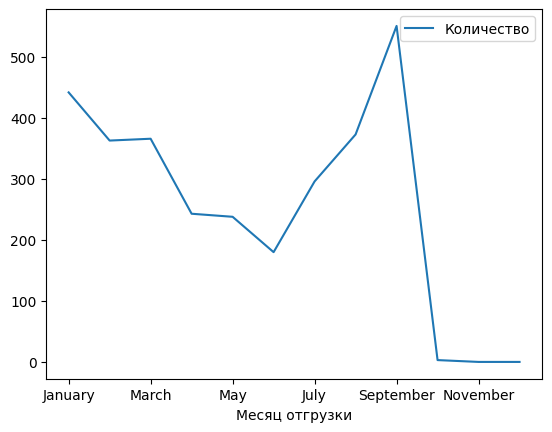

In [17]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Количество'].count().plot(legend=True)

In [18]:
# а также сумму, не всегда большее количество соответсвует большей сумме
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Месяц отгрузки
January       78928.00
February      82375.18
March         70957.38
April         48555.82
May           45415.05
June          41486.50
July          63385.25
August        74937.00
September    105322.69
October         496.00
November          0.00
December          0.00
Name: Итоговая стоимость товара, dtype: float64

<Axes: xlabel='Месяц отгрузки'>

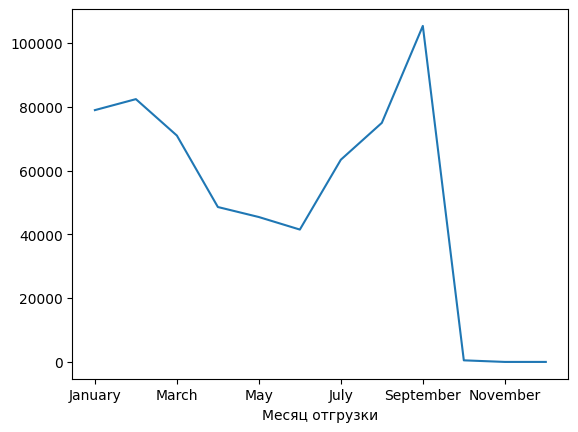

In [19]:
df.sort_values(by='Месяц отгрузки', ascending=True).groupby(['Месяц отгрузки'])['Итоговая стоимость товара'].sum().plot()

In [20]:
### Выведем общую сумму продаж
df['Итоговая стоимость товара'].sum()

611858.87

In [21]:
### Дубликаты есть, потому названия товара повторяются
df.duplicated().sum()

483

In [22]:
### Ищем нулевые ячейки, нас интересует месяц отгрузки и дата отгрузки
df.isnull().sum().sort_values()

Скидка руб                     0
Сегмент клиента                0
Способ доставки                0
Склад отгрузки                 0
Кластер доставки               0
Акции                          0
Юридическое лицо               0
Скидка %                       0
Способ оплаты                  0
Количество                     0
Итоговая стоимость товара      0
Наименование товара            0
Сумма отправления              0
Статус                         0
Месяц отгрузки                 0
Цена товара до скидок          0
Кластер отгрузки               6
Дата отгрузки                 10
Регион доставки               12
Город доставки               409
dtype: int64

In [24]:
# В основном это последние продажи - сентябрь, заменим нулевые значения на сентябрь.
# Регион и город доставки, Кластер отгрузки могут быть не указаны
df['Месяц отгрузки'] = df['Месяц отгрузки']. fillna ('September')
df['Дата отгрузки'] = df['Дата отгрузки']. fillna ('2023-09-01 01:00:00')
df.isnull().sum().sort_values()

Дата отгрузки                  0
Сегмент клиента                0
Способ доставки                0
Склад отгрузки                 0
Кластер доставки               0
Акции                          0
Юридическое лицо               0
Скидка %                       0
Скидка руб                     0
Количество                     0
Итоговая стоимость товара      0
Наименование товара            0
Сумма отправления              0
Статус                         0
Месяц отгрузки                 0
Цена товара до скидок          0
Способ оплаты                  0
Кластер отгрузки               6
Регион доставки               12
Город доставки               409
dtype: int64

In [25]:
# Склад отгрузки нет нулевых значений, посмотрим уникальные названия
df['Склад отгрузки'].unique()

array(['АДЫГЕЙСК_РФЦ', 'СПБ_БУГРЫ_РФЦ', 'ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ',
       'ПУШКИНО_2_РФЦ', 'САМАРА_РФЦ', 'ПУШКИНО_1_РФЦ', 'ВОРОНЕЖ_МРФЦ',
       'НИЖНИЙ_НОВГОРОД_РФЦ', 'КАЗАНЬ_РФЦ_НОВЫЙ', 'РОСТОВ-НА-ДОНУ_РФЦ',
       'НОВОСИБИРСК_РФЦ_НОВЫЙ', 'FRESH_MAX_РСТ_ШОЛОХОВО',
       'САНКТ-ПЕТЕРБУРГ_РФЦ', 'КАЛИНИНГРАД_МРФЦ', 'НОВОРОССИЙСК_МРФЦ',
       'FRESH_MAX_РСТ_ЗАПАДНЫЙ', 'КРАСНОЯРСК_МРФЦ', 'ХОРУГВИНО_РФЦ',
       'FRESH_MAX_КДР_ПОНОМАРЕНКО', 'ТВЕРЬ_РФЦ', 'FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ',
       'ЖУКОВСКИЙ_РФЦ', 'FRESH_MAX_КДР_МЕДИА_ПЛАЗА', 'СПБ_ШУШАРЫ_РФЦ',
       'СОФЬИНО_РФЦ'], dtype=object)

In [26]:
# Посмотрим откуда больше всего отгружается товар и отсортируем его по убыванию
sklad_otgruzki = df.groupby('Склад отгрузки')['Количество'].count()
sklad_otgruzki.sort_values(ascending=False)

Склад отгрузки
ПУШКИНО_1_РФЦ                568
САМАРА_РФЦ                   385
СПБ_БУГРЫ_РФЦ                306
ЖУКОВСКИЙ_РФЦ                255
ПУШКИНО_2_РФЦ                206
НИЖНИЙ_НОВГОРОД_РФЦ          187
НОВОРОССИЙСК_МРФЦ            168
ВОРОНЕЖ_МРФЦ                 158
ХОРУГВИНО_РФЦ                138
ЕКАТЕРИНБУРГ_РФЦ_НОВЫЙ       127
САНКТ-ПЕТЕРБУРГ_РФЦ          118
РОСТОВ-НА-ДОНУ_РФЦ           117
АДЫГЕЙСК_РФЦ                 114
СПБ_ШУШАРЫ_РФЦ                82
ТВЕРЬ_РФЦ                     57
КАЗАНЬ_РФЦ_НОВЫЙ              32
СОФЬИНО_РФЦ                   22
КРАСНОЯРСК_МРФЦ                6
НОВОСИБИРСК_РФЦ_НОВЫЙ          2
FRESH_MAX_КДР_ПОНОМАРЕНКО      2
КАЛИНИНГРАД_МРФЦ               1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА      1
FRESH_MAX_РСТ_ШОЛОХОВО         1
FRESH_MAX_РСТ_ЗАПАДНЫЙ         1
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ         1
Name: Количество, dtype: int64

In [27]:
# Регион доставки можем также отсортировать,
# 14 нулевых значений не играют большой роли, это скорее всего еще не доставленные товары
reg_deliver = df.groupby(['Регион доставки'])['Количество'].count().sort_values(ascending=False)
reg_deliver.head(20)

Регион доставки
Москва                                      540
Московская Область                          493
Санкт-Петербург                             264
Краснодарский Край                          263
Ленинградская Область                       127
Ростовская Область                          103
Татарстан Республика                         95
Самарская Область                            77
Воронежская Область                          68
Нижегородская Область                        61
Волгоградская Область                        48
Свердловская Область                         40
Мурманская Область                           35
Башкортостан Республика                      33
Крым Республика                              33
Ульяновская Область                          32
Вологодская Область                          31
Саратовская Область                          31
Республика Коми                              30
Ханты-Мансийский Автономный округ - Югра     30
Name: Количество, dtype:

In [28]:
# Проверим, что самое популярное из товара, отсортируем продажи по Наименованию и количеству продаж.
df.groupby('Наименование товара')['Количество'].count().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           467
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             360
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              186
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             174
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          154
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    152
Чай травяной Друг Вашего сна ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД                             138
Чай травяной Домбайский вальс Облепиха ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай                          123
Чай травяной Друг Ваших бронхов ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай

In [29]:
### Отсортируем Товар по сумме продаж.
df.groupby('Наименование товара')['Итоговая стоимость товара'].sum().sort_values(ascending=False)

Наименование товара
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                           74560.04
Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД             58017.70
Экстракт трав в капсулах "Друг вашей поджелудочной железы", 60 капсул, БАД                                   57966.34
Чай травяной Друг Ваших почек ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                              30424.33
Чай травяной Друг Вашей печени ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                             28630.47
Чай липы цветки 50г/ травяной сбор "Целебная Поляна"                                                         26121.00
Чайный напиток травяной листья Брусники ф/п 1,5г №20/ 20 пакетиков  Фитосбор, фиточай, БАД, Травяной сбор    25124.60
Чай травяной Друг Вашего давления ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД                          24451.87
Чай травяной Друг Вашего сна ф/п 1.5

In [41]:
# Проверим откуда и куда больше отправляют товар, отсортируем Склад отгрузки  и Регион доставки
# df.rename(columns={"Склад отгрузки": "Склад_отгрузки", "Регион доставки": "Регион_доставки"}, inplace=True)
name_region = df.groupby(['Склад_отгрузки', 'Регион_доставки'])['Количество'].count()
# Можно выгрузить данные по "Склад" - "Регион" в файл excel
# name_region.to_excel("output.xlsx")
name_region


Склад_отгрузки             Регион_доставки                         
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Волгоградская Область                       1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Краснодарский Край                          1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Краснодарский Край                          2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Ростовская Область                          1
FRESH_MAX_РСТ_ШОЛОХОВО     Ростовская Область                          1
                                                                      ..
ХОРУГВИНО_РФЦ              Тульская Область                            1
                           Удмуртская Республика                       1
                           Ульяновская Область                         2
                           Ханты-Мансийский Автономный округ - Югра    1
                           Ямало-Ненецкий Автономный округ             1
Name: Количество, Length: 399, dtype: int64

In [37]:
# Анализ доставки в регионы по каждому складу - 'ХОРУГВИНО_РФЦ'
name_region_horugvino = df[df['Склад_отгрузки'] == 'ХОРУГВИНО_РФЦ'].groupby(['Склад_отгрузки', 'Регион_доставки'])['Количество'].count()
name_region_horugvino.sort_values(ascending=False)

Склад_отгрузки  Регион_доставки                         
ХОРУГВИНО_РФЦ   Московская Область                          45
                Москва                                      44
                Санкт-Петербург                              7
                Республика Коми                              4
                Ленинградская Область                        4
                Татарстан Республика                         4
                Саратовская Область                          3
                Владимирская Область                         3
                Ульяновская Область                          2
                Самарская Область                            2
                Белгородская Область                         2
                Мурманская Область                           2
                Калужская Область                            2
                Калининградская Область                      2
                Нижегородская Область                        

In [35]:
# Анализ доставки в регионы по каждому складу - 'АДЫГЕЙСК_РФЦ'
name_region_adygey = df[df['Склад_отгрузки'] == 'АДЫГЕЙСК_РФЦ'].groupby(['Склад_отгрузки', 'Регион_доставки'])['Количество'].count()
name_region_adygey.sort_values(ascending=False)

Склад_отгрузки  Регион_доставки                    
АДЫГЕЙСК_РФЦ    Краснодарский Край                     63
                Ростовская Область                     10
                Воронежская Область                     9
                Волгоградская Область                   8
                Ставропольский Край                     6
                Республика Северная Осетия - Алания     3
                Санкт-Петербург                         2
                Белгородская Область                    2
                Республика Ингушетия                    2
                Астраханская Область                    1
                Тюменская Область                       1
                Сахалинская Область                     1
                Псковская Область                       1
                Пермский Край                           1
                Московская Область                      1
                Крым Республика                         1
                Воло

In [42]:
# Проверим откуда больше отправляют товар, отсортируем Наименование и Склад отгрузки
name_tea_by_storage = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Склад_отгрузки'])['Количество'].count()
name_tea_by_storage.sort_values(ascending=False)

Наименование товара                                                                 Склад_отгрузки        
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  ПУШКИНО_1_РФЦ             105
                                                                                    САМАРА_РФЦ                 92
                                                                                    ЖУКОВСКИЙ_РФЦ              55
                                                                                    НОВОРОССИЙСК_МРФЦ          36
                                                                                    СПБ_БУГРЫ_РФЦ              34
                                                                                    ХОРУГВИНО_РФЦ              30
                                                                                    РОСТОВ-НА-ДОНУ_РФЦ         22
                                                                                    ВОРОНЕЖ_МРФ

In [ ]:
# Проверим куда больше отправляют товар, отсортируем Наименование и регион доставки
name_tea_by_region = df[df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД'].groupby(['Наименование товара', 'Регион_доставки'])['Количество'].count()
name_tea_by_region.sort_values(ascending=False)


Наименование товара                                                                 Регион_доставки                         
Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД  Московская Область                          96
                                                                                    Москва                                      77
                                                                                    Краснодарский Край                          33
                                                                                    Санкт-Петербург                             29
                                                                                    Западно-Казахстанская область               15
                                                                                    Воронежская Область                         14
                                                                                    Самар

In [44]:
# Еще один параметр - склад отгрузки. Какой товар больше отправляют с какого склада.
name_sklad = df.groupby(['Склад_отгрузки', 'Наименование товара'])['Количество'].count()
name_sklad.head(50)

Склад_отгрузки             Наименование товара                                                                                      
FRESH_MAX_ВЛГ_ЗЕМЛЯЧКИ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_МЕДИА_ПЛАЗА  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_КДР_ПОНОМАРЕНКО  Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              2
FRESH_MAX_РСТ_ЗАПАДНЫЙ     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
FRESH_MAX_РСТ_ШОЛОХОВО     Чай травяной Друг Вашей поджелудочной железы ф/п 1.5г №20 / 20 пакетиков  Фитосбор, фиточай, БАД              1
АДЫГЕЙСК_РФЦ               Фитосбор "Для печени", 2 пачки по 20 фильтр-пакетов травяного чая                                             1
                           Фитосб

In [45]:
# Также можно вывести отдельно по каждой позиции статистику по месяцам: Количество и Сумму.
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Количество'].count()

Наименование товара  Месяц отгрузки
False                January           388
                     February          329
                     March             305
                     April             191
                     May               209
                     June              150
                     July              243
                     August            309
                     September         462
                     October             2
                     November            0
                     December            0
True                 January            54
                     February           34
                     March              61
                     April              52
                     May                29
                     June               30
                     July               53
                     August             64
                     September          89
                     October             1
                  

In [46]:
df.groupby([df['Наименование товара'] == 'Чай травяной Друг Вашего желудка ф/п 1.5г №20 /20 пакетиков Фитосбор, фиточай, БАД', 'Месяц отгрузки'])['Итоговая стоимость товара'].sum()

Наименование товара  Месяц отгрузки
False                January           70851.00
                     February          76302.66
                     March             61539.02
                     April             40638.34
                     May               40925.11
                     June              36442.00
                     July              54674.26
                     August            64502.42
                     September         91086.02
                     October             338.00
                     November              0.00
                     December              0.00
True                 January            8077.00
                     February           6072.52
                     March              9418.36
                     April              7917.48
                     May                4489.94
                     June               5044.50
                     July               8710.99
                     August            10434.58
    

# 4. Результаты исследования

### Общие выводы
С помощью данного инструмента (pandas) мы можем провести анализ как по каждой позиции - количество продаж, сумма, с какого склада и в какой регион больше отправка, так и видеть общую картину в целом. Определять пик продаж по месяцам, а нужно и по неделям. Группировать продажи, комбинировать разные параметры. Визуализация позволяет строить как обычные графики, так и в виде гистограм, круговых диаграм. Данный пример показывает возможности обработки данных его анализа и вывода результатов. Также возможен вывод данных в любой удобный формат, как ecxel, csv, json.
### Рекомендации
1.   Рекомендовать увеличить поставки наиболее продаваемого товара
2.   Использовать скидки в месяцы с наименьшими продажами
3.   В летние месяцы спад продаж, осенью и зимой больше затаривать склады
4.   Больше поставлять товар в регионы, но и не забывать про центр и северо-запад.



